# Assignment 2: Voting Visualized

TA Reviews

Grade for Textual Description: 6.0

Grade for Code Quality: 6.0

Grade for Results: 6.0

Comments: Amazing work  ! Some specific comments:

Task 1

Part B: Regarding rural areas, it would have been more relevant to showcase the communes with the smallest population instead. Your interpretation of urban/rural areas is appreciated (bonus: https://en.wikipedia.org/wiki/Pareto_principle)

Part C: The plots are well done. However the distribution isnt a power law ( the cdf should be a straight line if it were )

Task 2 :

Part B: The language borders are very much appreciated, congrats !

Task 3 

Part B: Awesome ! (The bar charts would be a bit easier to read if the two nuances of red would be further apart )

Tip: Avoid showing columns you do not refer to/are not relevant for the questions you are trying to answer. (i.e. Task 1b)



## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.
- Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything. 

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json
import folium
import branca.colormap as cm
import copy
# import vincent
# vincent.core.initialize_notebook()
from IPython.display import IFrame,display, HTML

In [3]:
data_folder = './data/'

### Notice!
Folium maps cannot be viewed directly from github so we exported every map to HTML and they are linked in the notebook. Also you can use the 'HW2_main.html' to view the whole homework.

[Click here to see Homework 2 as HTML file](HW2_main.html)

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

First, we create a map with a geographical center of Switzerland and add the cantonal borders to the map. Furthermore, we add a tooltip marker which shows the name of each canton when hovering over the canton. 

In [3]:
# Creating the map with a center in Switzerland
m = folium.Map(location=[46.87, 8.36], tiles='cartodbpositron', zoom_start=7, control_scale=True)

# Load the topojson file that contains the borders of the cantons.
topojson_cantons = json.load(open('data/ch-cantons.topojson.json'))

# Add the cantons to the map
folium.TopoJson(topojson_cantons,'objects.cantons',name='Switzerland Cantons', 
                style_function=lambda feature: {
                                'color': 'red',
                                'fillOpacity':0.1,
                                'weight': '1',
                                'dashArray': '5, 5'       
}).add_to(m)

# We take the names of the cantons from cantons.csv file to show them on our map
cantons = pd.read_csv('data/cantons.csv')

# Create a tooltip marker which shows the name of each canton when hovering over the canton
for data in topojson_cantons['objects']['cantons']['geometries']:
    cantons_topo = copy.deepcopy(topojson_cantons)
    cantons_topo['objects']['cantons']['geometries'] = [data]
    canton_id = cantons_topo['objects']['cantons']['geometries'][0]['id']
    canton_name = cantons[cantons['Code'] == canton_id]['Canton of'].values[0] 
    cantons_layer = folium.TopoJson(cantons_topo, 'objects.cantons')
    cantons_layer.add_child(folium.Tooltip(canton_name))
    cantons_layer.add_to(m)
    
# We export the map as HTML ('Switzerland_Cantons.html') and open it in the notebook and the link is below
m.save('Switzerland_Cantons.html')
IFrame(src="Switzerland_Cantons.html", width = 980, height = 600)

[Click here to see Switzerland_Cantons.html](Switzerland_Cantons.html)

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

First, we read the the first sheet '2017' of the spreadsheet 'communes_pop.xls':

In [4]:
communes = pd.read_excel('data/communes_pop.xls')
communes.head()

,su-f-01.02.04.07,"Bilan de la population résidante permanente selon les districts et les communes, en 2017",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Composantes de l'évolution de la population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Variation,NaN
2,NaN,Etat de la,Naissances,Décès,Accroissement,Arrivées 1),Départs,Solde,Divergences,Etat de la,en nombres,en %
3,NaN,population,vivantes,NaN,naturel,NaN,NaN,migratoire 1),statistiques,population,absolus,NaN
4,NaN,au 1er janvier,NaN,NaN,NaN,NaN,NaN,NaN,,au 31 décembre,NaN,NaN


We can notice that the data needs some modifications, so we changed the names of the columns and we reduced the number of rows:

In [5]:
colnames = ['commune','pop_start','birth','death','natrual_increase','arrive',\
            'depart','migration','divergence','pop_end','abs_increase','per']
communes = pd.read_excel('data/communes_pop.xls', sheet_name = 0, skiprows = 6, names = colnames,nrows = 2406)
communes.head()

,commune,pop_start,birth,death,natrual_increase,arrive,depart,migration,divergence,pop_end,abs_increase,per
0,- Zürich,1487969,17070,11076,5994,120593,108666,11927,-1544,1504346,16377,1.100628
1,>> Bezirk Affoltern,52904,517,310,207,4501,3862,639,21,53771,867,1.638817
2,......0001 Aeugst am Albis,1977,10,7,3,129,165,-36,-3,1941,-36,-1.820941
3,......0002 Affoltern am Albis,11900,128,93,35,1239,1029,210,1,12146,246,2.067227
4,......0003 Bonstetten,5435,47,25,22,374,322,52,3,5512,77,1.416743


NOTE: We observe that the notation for cantons begins with the sign '-' in front of the canton (i.e. '- Zurich'), the notation for districts is '>>' in front of the district (i.e. '- Bezirk Affoltern') and the notation for communes is in the following format '......0001' in front of the commune (i.e. '......0001 Aeugst am Albis'). Furthermore, the number of population in each canton is the sum of the population from every district in that particular canton (note that some cantones do not have districts, so the number of population in each canton is the sum of the population from every commune in that canton) and the number of population in each district is the sum of the population from every district in that particular canton, or:

Canton pop. = sum (District pop.) and District pop. = sum (Commune pop.)

or 

Canton pop. = sum (Commune pop.) //cases where the canton does not have districts

Below is the desription for canton, district and commune population which we got by using filters with regex expressions matching the special notiation mentioned above:

In [6]:
communes[communes.commune.str.contains('\d{4}')==True].pop_end.describe() # Commune population

count      2240.000000
mean       3787.558036
std       12436.473308
min          12.000000
25%         679.000000
50%        1493.500000
75%        3643.500000
max      409241.000000
Name: pop_end, dtype: float64

In [7]:
communes[communes.commune.str.contains('>>')==True].pop_end.describe() # District population

count       140.000000
mean      53544.678571
std       56980.837955
min        2279.000000
25%       18151.250000
50%       42854.000000
75%       68470.750000
max      413143.000000
Name: pop_end, dtype: float64

In [8]:
communes[communes.commune.str.contains('- ')==True].pop_end.describe() # Canton population

count    2.600000e+01
mean     3.263127e+05
std      3.489819e+05
min      1.610500e+04
25%      7.530525e+04
50%      2.346600e+05
75%      3.933068e+05
max      1.504346e+06
Name: pop_end, dtype: float64

From the results above, we can plot three different histograms showing the population in each commune, each district or each canton. Note that the total population from cantons is equal to the total population from communes (not equal to the total population of districts since not all cantones are divided into districts). In order to spot any outliers better we show these three histograms below:

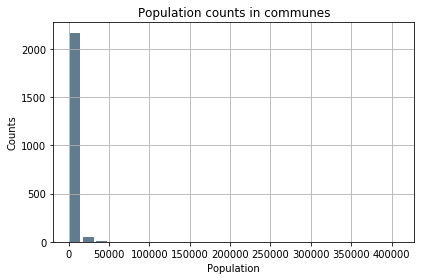

In [9]:
# Histogram of the population counts in communes  
plt.hist(communes[communes.commune.str.contains('\d{4}')==True].pop_end, bins=25, rwidth = 0.8, color='#607c8e')
plt.title("Population counts in communes")
plt.xlabel('Population')
plt.ylabel('Counts')
plt.grid()
plt.tight_layout()
plt.savefig("1.B Population counts in communes.png")
plt.show()

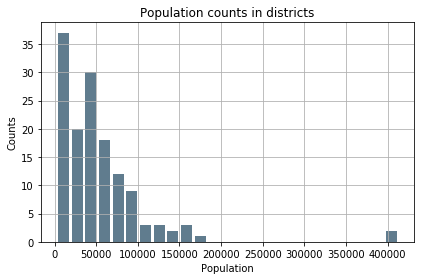

In [10]:
# Histogram of the population counts in districts
plt.hist(communes[communes.commune.str.contains('>>')==True].pop_end, bins=25, rwidth = 0.8, color='#607c8e')
plt.title("Population counts in districts")
plt.xlabel('Population')
plt.ylabel('Counts')
plt.grid()
plt.tight_layout()
plt.savefig("1.B Population counts in districts.png")
plt.show()

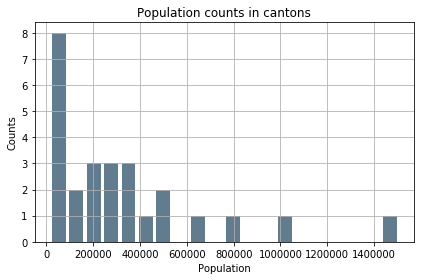

In [11]:
# Histogram of the population counts in cantones
plt.hist(communes[communes.commune.str.contains('- ')==True].pop_end, bins=20, rwidth = 0.8, color='#607c8e')
plt.title("Population counts in cantons")
plt.xlabel('Population')
plt.ylabel('Counts')
plt.grid()
plt.tight_layout()
plt.savefig("1.B Population counts in cantons.png")
plt.show()

From the descriptions and the histograms above we can notice that most of the population in the communes is in small quantities (with a mean value of around 3.787), but since the outliers cannot be observed in the first histogram because we are not using log scale, we can check by dividing all communes that have population more than 4.000 as urban, and all communes that have population less than 4.000 as rural. (we choose 4.000 as a treshold since we have a mean value for the communes 3.787, and 75% of the data is within this treshold) And we get the following results:

In [12]:
commune_ = communes[communes.commune.str.contains('\d{4}')==True] # Filtering the data only for the communes
urban = commune_[commune_['pop_end'] > 4000].sort_values(by='pop_end', ascending=False) # Defining urban population
rural = commune_[commune_['pop_end'] <= 4000].sort_values(by='pop_end', ascending=False) # Defining rural population
urban.head()

,commune,pop_start,birth,death,natrual_increase,arrive,depart,migration,divergence,pop_end,abs_increase,per
180,......0261 Zürich,402762,5289,3486,1803,35044,28684,6360,-1684,409241,6479,1.608642
2320,......6621 Genève,198979,2434,1397,1037,22666,20032,2634,-2102,200548,1569,0.788525
992,......2701 Basel,171017,1923,1846,77,11349,11000,349,70,171513,496,0.290030
1961,......5586 Lausanne,137810,1733,997,736,14233,14031,202,157,138905,1095,0.794572
376,......0351 Bern,133115,1689,1276,413,11325,10384,941,-671,133798,683,0.513090


In [13]:
urban.pop_end.describe()

count       512.000000
mean      12037.712891
std       24204.884341
min        4017.000000
25%        5044.000000
50%        6927.000000
75%       11405.250000
max      409241.000000
Name: pop_end, dtype: float64

In [14]:
rural.head()

,commune,pop_start,birth,death,natrual_increase,arrive,depart,migration,divergence,pop_end,abs_increase,per
232,......0739 Ipsach,4015,26,28,-2,246,257,-11,-6,3996,-19,-0.473225
2183,......6154 Port-Valais,3937,30,21,9,518,450,68,-19,3995,58,1.473203
1566,......4303 Böttstein,3942,40,35,5,304,266,38,1,3986,44,1.116185
638,......1205 Bürglen (UR),4021,44,39,5,180,226,-46,2,3982,-39,-0.969908
2148,......6082 Ayent,3935,35,40,-5,269,228,41,4,3975,40,1.016518


In [15]:
rural.pop_end.describe()

count    1728.000000
mean     1343.067708
std      1003.467173
min        12.000000
25%       529.250000
50%      1066.500000
75%      1947.000000
max      3996.000000
Name: pop_end, dtype: float64

From the table above we can observe that the first histogram has several outliers larger than 50.000 (10 to be precise) that cannot be seen on the histogram and the biggest one with a value of 409.241 (which is the commune of Zurich). 

Furthermore, we can count how many communes belong to each category and how many people does each one have to provide our final conclusion. 

In [16]:
print('Urban population in Switzerland: {:,} or {:2.2%}'.format(urban.pop_end.sum(),urban.pop_end.sum()/commune_.pop_end.sum()))
print('Rural population in Switzerland: {:,} or {:2.2%}'.format(rural.pop_end.sum(),rural.pop_end.sum()/commune_.pop_end.sum()))
print('Number of urban communes in Switzerland: {:,} or {:2.2%}'.format(urban.pop_end.count(),urban.pop_end.count()/commune_.pop_end.count()))
print('Number of rural communes in Switzerland: {:,} or {:2.2%}'.format(rural.pop_end.count(),rural.pop_end.count()/commune_.pop_end.count()))

Urban population in Switzerland: 6,163,309 or 72.65%
Rural population in Switzerland: 2,320,821 or 27.35%
Number of urban communes in Switzerland: 512 or 22.86%
Number of rural communes in Switzerland: 1,728 or 77.14%


In general, theese histograms and datasets tell us that the number of rural communes (77%) in Switzerland is greater than urban communes (23%), but the population is completely opposite, namely around 73% of the population in Switzerland lives in urban areas (if urban and rural areas are defined as we defined them), and around 27% of the population in Switzerland lives in rural areas.

__C)__ Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

First we extract the data from our first histogram in variables bins(population on x axis) and hist(counts on y axis) for the first case of 25 bins and we represent the first loglog scale histogram.

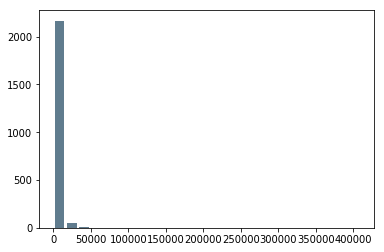

In [17]:
hist, bins, _ = plt.hist(commune_.pop_end, bins=25, rwidth = 0.8, color='#607c8e') # Extract hist and bins

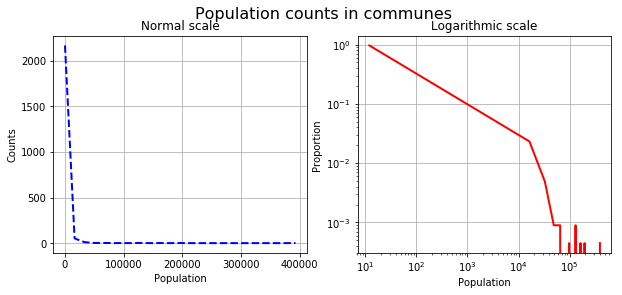

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(bins[:-1],hist,color="blue", lw=2, ls='--') # Plot of the first histogram (normal scale)
axes[0].set_title("Normal scale")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Counts")
axes[0].grid()

axes[1].loglog(bins[:-1],hist/sum(hist),color="red", lw=2, ls='-') # Plot of the first histogram (loglog scale)
axes[1].set_title("Logarithmic scale")                             # Y-axes values are represented as '%'
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Proportion")
axes[1].grid()

fig.suptitle("Population counts in communes", fontsize=16)

fig.savefig("1.C Population counts in communes 25 bins.png")

Here we display the second case which consists of 500 bins to demonstrate the difference in the results.

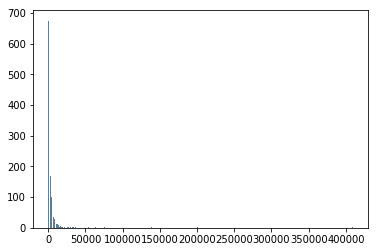

In [19]:
hist1, bins1, _ = plt.hist(commune_.pop_end, bins=500, rwidth = 0.8, color='#607c8e') # Extract hist and bins

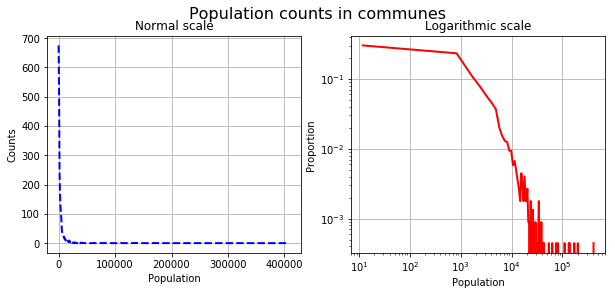

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(bins1[:-1],hist1,color="blue", lw=2, ls='--') # Plot of the second histogram (normal scale)
axes[0].set_title("Normal scale")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Counts")
axes[0].grid()

axes[1].loglog(bins1[:-1],hist1/sum(hist1),color="red", lw=2, ls='-') # Plot of the second histogram (loglog scale)
axes[1].set_title("Logarithmic scale")                                # Y-axes values are represented as '%'
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Proportion")
axes[1].grid()

fig.suptitle("Population counts in communes", fontsize=16)

fig.savefig("1.C Population counts in communes 500 bins.png")

We represent two histograms using two different bin sizes to observe the power law relationship between the frequency of each bin and the population in communes. We notice that when we use more bins we get much more clear representation of the frequency of population in communes and that the distribution follows a power law. We can state that at the right-hand end of the distribution the fluctuations in the bin counts are large due to the fact that each bin only has a few samples in it and this appears as a noisy curve on the plot. In order to avoid theese fluctuations we can remove the data in this part which is not advisable or display a distribution with less bars and see the overall distribution. And here we present a third case where we display 10 bins to demonstrate the difference in the results.

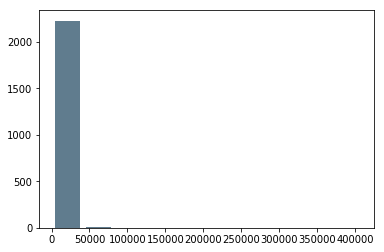

In [21]:
hist2, bins2, _ = plt.hist(commune_.pop_end, bins=10, rwidth = 0.8, color='#607c8e') # Extract hist and bins

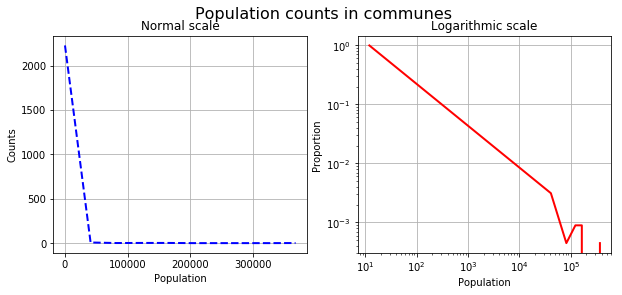

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(bins2[:-1],hist2,color="blue", lw=2, ls='--') # Plot of the third histogram (normal scale)
axes[0].set_title("Normal scale")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Counts")
axes[0].grid()

axes[1].loglog(bins2[:-1],hist2/sum(hist1),color="red", lw=2, ls='-') # Plot of the third histogram (loglog scale)
axes[1].set_title("Logarithmic scale")                                # Y-axes values are represented as '%'
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Proportion")
axes[1].grid()

fig.suptitle("Population counts in communes", fontsize=16)

fig.savefig("1.C Population counts in communes 10 bins.png")

Here we give the cumulative representation, as shown in Fig.(d), in which the y-axis represents the number of data points with values greater than y.

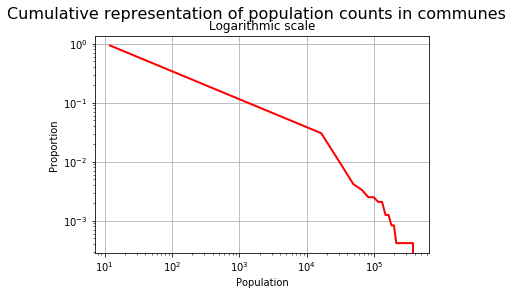

In [23]:
cumul = [sum(hist[i:]) for i in range(len(hist))] # Calculate the cumulative values for case with 25 bins
cumul[-1]=0

fig, axes = plt.subplots(figsize=(6,4))
      
axes.loglog(bins[:-1],cumul/sum(cumul),color="red", lw=2, ls='-') # Plot of the histogram (loglog scale)
axes.set_title("Logarithmic scale")                                
axes.set_xlabel("Population")
axes.set_ylabel("Proportion")
axes.grid()

fig.suptitle("Cumulative representation of population counts in communes", fontsize=16)

fig.savefig("1.C Cumulative representation 25 bins.png")

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

Load `voters.xls` as voters and rename the columns with party names. This dataframe includes canton name, voting year, voting porprotion compared to registered voters (named as 'participation') and also percentage of voters for each party.

In [24]:
# data from 2014-2018
voters = pd.read_excel('data/voters.xls',sheet_name = 0,skiprows = 5,nrows = 30)
voters = voters.dropna(axis = 1,how = 'all')
voters = voters.dropna(axis = 0,how = 'all')
names = ['canton','year','participation','PLR','PDC','PS','UDC','PLS','PEV','PCS','PVL','PBD','PST','PSA','PES','AVF','Sol','DS','UDF','Lega','MCR','Autres','Total']
voters.columns = names
voters = voters.reset_index()
voters.head()

,index,canton,year,participation,PLR,PDC,PS,UDC,PLS,PEV,...,PSA,PES,AVF,Sol,DS,UDF,Lega,MCR,Autres,Total
0,0,Zurich,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,NaN,4.271767,...,NaN,7.218776,2.977664,NaN,NaN,2.662277,NaN,NaN,0.669707,100
1,1,Berne,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,NaN,6.172897,...,0.681873,10.104467,0.495841,NaN,0.179432,3.710624,NaN,NaN,0.912781,100
2,2,Lucerne,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,NaN,0.199143,...,NaN,6.700011,NaN,NaN,NaN,NaN,NaN,NaN,0.036129,100
3,3,Uri 1),2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,NaN,NaN,...,NaN,2.378061,NaN,NaN,NaN,NaN,NaN,NaN,2.428270,100
4,4,Schwytz,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,NaN,0.304428,...,NaN,0.800215,NaN,NaN,NaN,NaN,NaN,NaN,1.513578,100


Load `national_council_elections.xlsx` as election. The dataframe election includes canton name, total number of registered voters, number of participate voters and the participation.

In [25]:
# data from 2015
election = pd.read_excel('data/national_council_elections.xlsx',sheet_name = 0,skiprows = 8,nrows = 26)
names = ['canton','regis_voter','voter','participation']
election.columns = names
election.head()

,canton,regis_voter,voter,participation
0,Zurich,907623,428837,47.248362
1,Berne,729203,357770,49.063155
2,Lucerne,271143,138096,50.931059
3,Uri 1),26414,15091,57.132581
4,Schwytz,102145,54857,53.705027


Load `cantons.csv` as cantons and create a new dataframe named cantonvoter, which includes the canton code, canton voting rate for UDC and number of voters. Then we add a column named 'UDCvoters' to cantonvoter, which is created by multiplying UDC voting rate and the number of voters.

In [26]:
cantons = pd.read_csv('data/cantons.csv')
cantonvoter = pd.concat([cantons['Code'],voters['UDC'],election['voter']],axis=1)
cantonvoter['UDCvoter'] = np.round(cantonvoter.UDC.get_values()*cantonvoter.voter.get_values()/100)
cantonvoter.head()

,Code,UDC,voter,UDCvoter
0,ZH,30.023215,428837,128751.0
1,BE,26.760869,357770,95742.0
2,LU,24.115646,138096,33303.0
3,UR,24.053191,15091,3630.0
4,SZ,33.115090,54857,18166.0


Next, after loading and creating the dataframe, we are going to visualize the voting result. Here we use choropleth to fill the canton with color RGB proportionally to data value (voting rate or number of voting residents). The darker the color, the larger the data value. 

As for the canton missing data (namely Appenzell Ausserrhoden and Graubünden), we fill in the canton with gray (RGB: #999999). Then we add pop up showing detailed infomation of each canton. 

Also, we outline different language speaking areas( French, German and Italian) with different line color (Blue, red and green respectively) so the user can see how the UDC voting result differ in different language speaking areas.

In [27]:
def color_mapCanton(canton,colormap,voterCol):
    """
    
    This function is used to return RGB value of corresponding data (voting ratio or voter number) according to input colormap.
    
    Parameters:
        canton:
        feature['ID'] from topojson. Here it is the code of canton. Eg. 'ZH' refers to Zurich.
        
        colormap:
        The colormap created before.
    
        voterCol:
        The column name of cantonvoter we want to plot. Eg. 'UDC' refers the ratio of UDC voters, and 'UDCvoter' refers to actual voter number.
    
    Returns:
        RGB value in hex. Setting the fillColor in style_function of the polygon.
    
    """
    if np.isnan(cantonvoter.loc[(cantonvoter['Code']==canton)][voterCol]).get_values():
        return '#999999'
    # For the canton with nan we fill it with gray color.
    else:
        return colormap(cantonvoter.loc[(cantonvoter['Code']==canton)][voterCol].get_values())
    # Fill the canton with RGB proportionally to data value.

In [28]:
def languages_border(canton,language):
    """
    
    Outline the border of French-, German-, and Italian speaking cantons by bolding the border.
    
    Parameters:
        canton:
        feature['ID'] from topojson. Here it is the code of canton. Eg. 'ZH' refers to Zurich.
        
        language:
        The language user wants to outline. Eg. 'French', 'German' or 'Italian'
    
    Return:
        The 'weight' in folium.Topojson.style_function, which controls the width of lines. 
        '2' means bolding and '0' means not drawing the line.
        
    """
    # cantons.loc[cantons['Official languages'] == language]['Code']
    lang = cantons.loc[cantons['Code'] == canton]['Official languages'].str.contains(language).values[0]
    if lang:
        return 2
    # For cantons in certain language speaking area, we bold its border.
    else:
        return 0
    # For cantons not in the language speaking area, we do not draw its border.

In [29]:
def languages_cantons(topojson,language,line_color):
    """
    
    Outline the border of French-, German-, and Italian speaking cantons by bolding the border and emphasizing in different colors.
    
    Parameters:
        topojson: 
        The topojson contains infomation of canton code, canton position and borders.
        
        language:
        The language area we want to find.
        
        line_color:
        The RGB value of color. Used to set the border color.
        
    Return:
        Return folium.map.FeatureGroup layer, which can be added to map.
    
    """
    feature_group = folium.FeatureGroup(name=language,overlay = True,show = False)
    folium.TopoJson(
        topojson,object_path = 'objects.cantons',
        style_function = lambda feature: {
            'fillColor': '#999999',
            'color' : line_color, # setting the border color
            'weight' : languages_border(feature['id'],language), # setting the the line weight of canton borders
            'fillOpacity': 0, # not filling cantons with color
            'dashArray' : '5, 5'
            }
        ).add_to(feature_group)
    return feature_group

In [30]:
def datacolormap(voterCol,caption1):
    """
    
    Create linear colopmap for data.
    
    Parameter:
        voterCol:
        The column name of cantonvoter we want to plot. Eg. 'UDC' refers the ratio of UDC voters, 
        and 'UDCvoter' refers to actual voter number.
        
        caption1:
        Part of the caption which will be shown below the colorbar.
        
    Return:
        Return a linear colormap based on linear interpolation of a set of colors over given index.
    
    """
    color_range = ['#023858','#084081','#0868ac','#2b8cbe','#4eb3d3','#7bccc4','#a8ddb5','#ccebc5','#e0f3db','#f7fcf0','#fff7bc']
    colormap = cm.LinearColormap(
        color_range[::-1],
        vmin =  0, 
        vmax = round(max(cantonvoter[voterCol])+1),
        index = np.linspace(round(min(cantonvoter[voterCol])),round(max(cantonvoter[voterCol])+1),11),
        caption = ''.join([caption1,' of voters for UDC in every canton'])
    )
    return colormap

In [31]:
def visualization_UDCvoting(m,topojson,voterCol,caption,mapname):
    
    """
    
    Visualizing the canton voting result to the party UDC and finally save the map as .html file.
    
    Parameters:
        
        m: 
        The original map onto which we add language area, pop-ups of detailed number of every canton and colormap.
    
        topojson:
        The topojson contains infomation of canton code, canton position and borders.
    
        voterCol:
        The column name of cantonvoter we want to plot. Eg. 'UDC' refers the ratio of UDC voters, and 'UDCvoter' refers to actual voter number.
    
        caption:
        Part of the caption which will be shown below the colorbar.
    
        mapname:
        Save the map in this mapname.
    
    """

    # Outline the border of French-, German-, and Italian speaking cantons, 
    # and color the outline with blue, red and green respectively.
    French = languages_cantons(topojson,'French','#0000ff')
    German = languages_cantons(topojson,'German','#ff0000')
    Italian = languages_cantons(topojson,'Italian','#00ff00')

    # Create the colormap to visualize the proportion/number different in selected cantonvoter column.
    colormap1 = datacolormap(voterCol,caption)
    
    # Draw the choropleth for selected cantonvoter column.
    vote_map = folium.FeatureGroup(name='Voting visulization',overlay = True,show = True)
    
    folium.TopoJson(
        topojson1,object_path = 'objects.cantons',control = False,
        style_function = lambda feature: {
            'fillColor': color_mapCanton(feature['id'],colormap1,voterCol),
            'color' : 'black',
            'fillOpacity': 0.9,
            'weight' : 1,
            'dashArray' : '5, 5'
            }
        ).add_to(vote_map)

    # Add pop up infomation (Eg. Voting ratio, number of residents) for each canton.
    popup = folium.FeatureGroup(name='Pop-ups',overlay = True,show = True)

    for data in topojson['objects']['cantons']['geometries']:
        cantons_topo = copy.deepcopy(topojson)
        cantons_topo['objects']['cantons']['geometries'] = [data]
        canton_id = cantons_topo['objects']['cantons']['geometries'][0]['id']
        if np.isnan(cantonvoter.loc[(cantonvoter['Code']==canton_id)].UDC).get_values():
            canton_layer = folium.TopoJson(cantons_topo, 'objects.cantons', control = False,
                                           show = False,
                                          style_function = lambda feature:{
                                              'fillOpacity':0,
                                              'weight' : 0
                                          })
            canton_layer.add_child(folium.Tooltip(canton_id+': No data.'))
            canton_layer.add_to(popup)
        else:
            if caption == 'Percentage':
                rate = round(cantonvoter[cantonvoter['Code'] == canton_id][voterCol].values[0],3)
                rate = str(rate)+'%'
            else:
                rate = int(cantonvoter[cantonvoter['Code'] == canton_id][voterCol].values[0])
            canton_layer = folium.TopoJson(cantons_topo, 'objects.cantons', control = False, show = False,
                                          style_function = lambda feature:{
                                              'fillOpacity':0,
                                              'weight' : 0
                                          })
            canton_layer.add_child(folium.Tooltip(canton_id+': '+str(rate)))
            canton_layer.add_to(popup)
    
    # Add layers to the map.
    vote_map.add_to(m)
    popup.add_to(m)
    colormap1.add_to(m)
    French.add_to(m)
    German.add_to(m)
    Italian.add_to(m) 
    
    folium.LayerControl(collapsed = True).add_to(m)
    
    # Save the map with layers.
    folium.Map.save(m, mapname)

The map we create is interactive. When you hover with mouse on the map, there will pop up a bubble with canton code and data of the this canton.(Eg. 'ZH: 30.023%' means the rate voting for UDC in Zurich is 30.023%, 'ZH: 128751' means the number of residents in Zurich voting for UDC is 128751.)

And different language speaking area is outlined with different color, namely French in blue, German in red and Italian in green, corresponding to their national flag color and can be selected through the layers of the map.

**ATTENTION**: Initially we show the choropleth of canton voting and the pop-up layer, where users can get the details on the map by hovering the mouse over the cantons. However, due to toggle order, if users want to display borders of different language speaking area (like French), they will need to choose the layer they want to display and to go back they need to cancel and toggle again the pop-up layers to show pop up information.

**MAP A**

In [4]:
# For the period 2014-2018 and for each canton, visualize the percentage of voters who voted for the party UDC.
m1 = folium.Map(location = [46.87, 8.36], tiles='cartodbpositron', zoom_start=7)
topojson1 = json.load(open(r'data/ch-cantons.topojson.json'))
topojson1['objects']['cantons']['geometries']
# visualization_UDCvoting(m1,topojson1,'UDC','Percentage','PercentageUDC.html')
# IFrame(src='PercentageUDC.html',width=980,height=600)

[{'type': 'Polygon',
  'arcs': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
  'id': 'ZH',
  'properties': {'name': 'Zürich'}},
 {'type': 'MultiPolygon',
  'arcs': [[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], [23], [24]],
   [[25, 26]],
   [[27]],
   [[28, 29]]],
  'id': 'BE',
  'properties': {'name': 'Bern/Berne'}},
 {'type': 'Polygon',
  'arcs': [[-12, 30, 31, 32, 33, 34]],
  'id': 'LU',
  'properties': {'name': 'Luzern'}},
 {'type': 'Polygon',
  'arcs': [[35, 36, 37, 38, -16, 39, 40, 41]],
  'id': 'UR',
  'properties': {'name': 'Uri'}},
 {'type': 'Polygon',
  'arcs': [[42, -33, 43, -1, 44, 45, 46, -42]],
  'id': 'SZ',
  'properties': {'name': 'Schwyz'}},
 {'type': 'MultiPolygon',
  'arcs': [[[-13, -35, 47]], [[-15, 48, -40]]],
  'id': 'OW',
  'properties': {'name': 'Obwalden'}},
 {'type': 'Polygon',
  'arcs': [[-34, -43, -41, -49, -14, -48]],
  'id': 'NW',
  'properties': {'name': 'Nidwalden'}},
 {'type': 'Polygon',
  'arcs': [[49, -36, -47, 50, 51]],
  'id': 'GL',
  'properties': {'

In [7]:
topojson1['objects']['cantons']['geometries'][0]

{'type': 'Polygon',
 'arcs': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
 'id': 'ZH',
 'properties': {'name': 'Zürich'}}

[Click here to see PercentageUDC.html](PercentageUDC.html)

In this map we can see the percentage for the party UDC differs in different language speaking area. Intuitively, as the map shows, voting rate in German speaking is higher than other two language speaking areas on average. The voting rate for UDC is extremely high in German - only speaking area (where German is the only official language) compared to French - only speaking area. And in the Italian speaking area the voting rate is lowest among three language areas.

**MAP B**

In [33]:
# For 2015, visualize the number of residents in each canton who voted for UDC.
m1 = folium.Map(location=[46.87, 8.36], tiles='cartodbpositron', zoom_start=7)
topojson1 = json.load(open(r'data/ch-cantons.topojson.json'))

visualization_UDCvoting(m1,topojson1,'UDCvoter','Number','NumberUDC.html')
IFrame(src='NumberUDC.html',width=980,height=600)

[Click here to see NumberUDC.html](NumberUDC.html)

Here the map shows the number of residents voting for UDC of each canton. This time, something has changed subtly. The German speaking area contains the highest number of UDC voting residents (namely, Zurich) but on average, we cannot say confidently that the average number of each canton in German-speaking area is higher than that in French-speaking area. The difference in percentage map and number map may result from the population varying from canton to canton. 

The difference in percentage map and number map may result from the population varying from canton to canton. And to the national election with majority voting,

According to the official website([cantonal parliament elections](https://www.ch.ch/en/demokratie/federal-and-cantonal-elections-when-and-how/election-of-cantonal-parliaments-when-and-how/),cantonal parliament are also generally elected by a majority system (first-past-the-post). In this situation, the party has to win the largest proportion to win the canton. So the percentage map will offer more information to them.


## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

**TASK A**

In order to get the "Right Lean", we first have to extract useful columns('canton','UDC','PS') from `voters` and make a new column 'lean' to save the value according to definition above. Then we can get a new dataframe `voters_withlean` which contains all values we need.

In [34]:
# import data and get useful info
voters_withlean = voters[['canton', 'UDC', 'PS']]
#caculate 'lean' according to definition
voters_withlean['lean'] = (voters_withlean['UDC']-voters_withlean['PS'])/(voters_withlean['UDC']+voters_withlean['PS'])
voters_withlean = voters_withlean.merge(cantons[['Code']], left_index=True, right_index=True)
voters_withlean.head()

C:\Users\Ekonomski\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,canton,UDC,PS,lean,Code
0,Zurich,30.023215,19.716444,0.207214,ZH
1,Berne,26.760869,22.328775,0.090286,BE
2,Lucerne,24.115646,11.848915,0.341078,LU
3,Uri 1),24.053191,12.984966,0.298833,UR
4,Schwytz,33.115090,12.925363,0.438521,SZ


In [35]:
max(voters_withlean.lean)

0.7057886963474544

In [36]:
voters_withlean['lean'].isnull().value_counts()

False    24
True      2
Name: lean, dtype: int64

But after checking the dataset, we find out that there are two NAN in `voters_withlean['lean']`, because we have missing values (namely Appenzell Ausserrhoden and Graubünden). And we plan to fill in these cantons with gray color (RGB: #999999) as the previous task. Then we add pop up showing detailed infomation of each canton. 

Here we use Topojson with stylefunction to fill the canton with color RGB according to lean value.

First, we need a function to create a colormap for our vasulisation which is slightly different from the function used in the previous task (here we have negative values). The darker the color, the larger the data value is.(And Grey means no data here)

In [37]:
def make_colormap(data_column, caption, color_range=['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7',\
                                                     '#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']):
    """
    This is function to Create linear colormap.
    
    Parameter:
        data:
        data should be a series
        
        caption1:
        the caption which will be shown below the colorbar.
        
        color_range:
        default is a 11 levels yellow-blue bar
        
    Return:
        Return a linear colormap based on linear interpolation of a set of colors over given index.
    
    """
    colormap = cm.LinearColormap(
        color_range[::-1],
        vmin = round(min(data_column)*0.6-0.5), 
        vmax = round(max(data_column)*0.6+0.5),
        index = np.linspace(round(min(data_column)*0.6-0.5), round(max(data_column)*0.6+0.5), 11),
        caption = caption
    )
    return colormap

The default color_range in colormap:

In [38]:
make_colormap(voters_withlean['lean'], 'Right Lean of Each Canton' )

We still need another funciton to distinguish and give NAN a color:

In [39]:
def get_color(dataframe, index, canton_id, color_range=['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7',\
                                                     '#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']):
              
    """
    This is function to get RGB values of each canton (include nan).
    
    Parameter:
        dataframe:
        the datafram including columns ['Code'] 
        
        index:
        index is a str name of one column in dataframe  eg.index='lean'
        
        canton_id:
        id of canton eg: 'ZH'
        
        color_range:
        a list of 11 levels RGB values to custumize the color
        
    Return:
        Return a RGB value for lean
    
    """
    data = dataframe[dataframe['Code']== canton_id][index].iloc[0]
    color = make_colormap(dataframe[index], index, color_range)
    if np.isnan(data):
        return '#999999' # grey for no data
    else:
        return color(data)

In [40]:
print('The color of ZH: ',get_color(voters_withlean, 'lean', 'ZH'))
print('The color of GR: ',get_color(voters_withlean, 'lean', 'GR'))

The color of ZH:  #fdd9c5
The color of GR:  #999999


In [41]:
def make_layer(topojson, dataframe, index, color_range=['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7',\
                                                     '#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']):
    """
    
    make a layer for right lean, which canbe add to map directly
    
    Parameters:
        topojson: 
        The topojson contains infomation of canton code, canton position and borders.
        
        dataframe:
        the datafram including columns ['Code'] 
        
        index:
        index is a str name of one column in dataframe
        
        color_range:
        a list of 11 levels RGB values to customize the color
        
    Return:
        Return folium.map.FeatureGroup layer, which can be added to map.
    
    """
    feature_group = folium.FeatureGroup(name=index, overlay = True, show = False)
    folium.TopoJson(
        topojson,object_path = 'objects.cantons',
        style_function = lambda feature: {
            'fillColor': get_color(dataframe, index, feature['id'], color_range), #fill color according to its index value
            'color' : 'black', # setting the border color
            'weight' :  1, # setting the the line weight of canton borders
            'fillOpacity': 1, 
            'dashArray' : '5, 5'
            }
        ).add_to(feature_group)
    return feature_group

This function is to make a pop-up layer to display the exact data we want to show. In this part, we need to use `copy.deepcopy` to get information of topojson. Then, we give variable `data` the value of index and chage it to string which is easy to be print. Lastly, we add all information to the Featuregroup we create before.

In [42]:
def column_isnan(dataframe, index, canton_id):
    """
    to test does the datafram[index] is NAN where dataframe['Code'] == canton_id
    
    Parameters:
        
        dataframe:
        the datafram including columns ['Code']
        
        index:
        the str name of a colum in dataframe eg: 'lean'
        
        canton_id:
        The id of canton eg: 'ZH'
        
    Return:
        Return folium.map.FeatureGroup layer, which can be added to map.
    
    """
    return np.isnan(dataframe[(dataframe['Code'] == canton_id)][index]).get_values()

In [43]:
def make_popup_data_layer(topojson, dataframe, index):
    """
    
     Add pop up infomation (Eg. Voting ratio, number of residents) for each canton.
    
    Parameters:
        topojson: 
        The topojson contains infomation of canton code, canton position and borders.
        
        dataframe:
        the datafram including columns ['Code']
        
        index:
        the str name of a colum in dataframe eg: 'lean'
        
    Return:
        Return folium.map.FeatureGroup layer, which can be added to map.
    
    """
    
    popup = folium.FeatureGroup(name='Pop-ups',overlay = False, show = True)

    for data in topojson['objects']['cantons']['geometries']:
        
        #copy information in topojson
        cantons_topo = copy.deepcopy(topojson)
        cantons_topo['objects']['cantons']['geometries'] = [data]
        canton_id = cantons_topo['objects']['cantons']['geometries'][0]['id']
        canton_name = cantons[dataframe['Code'] == canton_id]['Canton of'].values[0]
        
        #get value of index and chage to str
        if column_isnan(dataframe, index, canton_id):
            data = 'No data.'
        else:
            data = str(round(dataframe[dataframe['Code'] == canton_id][index].values[0],2))
        
        #create layer of caton using foliun.Topojson
        canton_layer = folium.TopoJson(cantons_topo, 'objects.cantons', control = False, show = False,
                                          style_function = lambda feature:{
                                              'fillOpacity':0,
                                              'weight' : 0
                                          })
        #add popup infomation to base layer
        canton_layer.add_child(folium.Tooltip(canton_name + ' ' + index + ':  '+ data))
        canton_layer.add_to(popup)
        
    return popup

In [44]:
topojson = json.load(open(r'data/ch-cantons.topojson.json'))
mp = folium.Map([46.87, 8.36], tiles='cartodbpositron', zoom_start=7)

make_colormap(voters_withlean['lean'], 'Right Lean of Each Canton').add_to(mp)
make_layer(topojson, voters_withlean, 'lean').add_to(mp)
make_popup_data_layer(topojson, voters_withlean, 'lean').add_to(mp)

folium.Map.save(mp, 'Right_lean.html')
IFrame(src="Right_lean.html", width = 980, height = 600)

[Click here to see Right_lean.html](Right_lean.html)

### Conclusion of A)

From the plot above, we can observe the röstigraben indeed when we combine with language boarders which we draw in the previous task. Here we use diverging color (red vs. blue) to show the right lean or left lean of each canton. This is clear that German-speaking cantons are more likely to have red colors while French-Speaking cantons mostly hold blue color. Greman-speaking areas are more intend to have right lean, which means they more prefer UDC than PS in 2014-2018 selection.


__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

First, we need to import the two periods' data. But there is some values equal to '*' in 2010-2013. So we replace them with np.nan. And we drop some columns to focus on information we are interested in.

In [45]:
# deal with voters_org(to get rid of '*' which is tricky while deleting nan)
voters_org_2010 = pd.read_excel('data/voters.xls',sheet_name = 5,skiprows = 5,nrows = 30)
voters_org_2010 = voters_org_2010.fillna(np.nan)
voters_org_2010 = voters_org_2010.replace({'*':np.nan})
voters_org_2010 = voters_org_2010.dropna(axis = 1, how = 'all')
voters_org_2010 = voters_org_2010.dropna(axis = 0, how = 'all')
names = ['canton','year','participation','PLR','PDC','PS','UDC','PLS','PEV','PCS','PVL','PBD','PST','PSA','PES','AVF','Sol','DS','UDF','Lega','MCR','Autres','Total']
voters_org_2010.columns = names
voters_org_2010 = voters_org_2010.reset_index().drop(['index'],axis = 1)
voters_org_2010 = pd.concat([cantons[['Code']], voters_org_2010.iloc[:,3:-2]], axis=1)

#get voters_org_2014 from voters
voters_org_2014 = voters
voters_org_2014 = voters_org_2014.drop(['index'],axis = 1)
voters_org_2014 = pd.concat([cantons[['Code']], voters_org_2014.iloc[:,3:-2]], axis=1)

voters_org_2010.head()

,Code,PLR,PDC,PS,UDC,PLS,PEV,PCS,PVL,PBD,PST,PSA,PES,AVF,Sol,DS,UDF,Lega,MCR
0,ZH,12.934426,4.862598,19.317182,29.635552,NaN,3.778014,NaN,10.265505,3.465970,NaN,NaN,10.569400,1.627417,NaN,0.405206,2.571601,NaN,NaN
1,BE,10.335474,1.256537,18.852832,26.621577,NaN,5.898273,NaN,4.071319,16.027757,NaN,1.039215,10.101410,NaN,NaN,0.414800,4.403570,NaN,NaN
2,LU,18.864849,31.298184,10.964228,22.126508,NaN,NaN,NaN,5.904835,1.661765,NaN,NaN,8.668342,NaN,NaN,NaN,NaN,NaN,NaN
3,UR,20.281885,36.611083,12.085318,24.629866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892682,NaN,NaN,NaN,NaN,NaN,NaN
4,SZ,22.818461,29.083853,12.381160,34.004523,NaN,NaN,NaN,NaN,0.030112,NaN,NaN,0.189013,NaN,NaN,NaN,NaN,NaN,NaN


Because it requires visualised difference between two time periods, we caculate voters difference of each party as follows:

In [46]:
voters_org_diff = pd.concat([cantons[['Code']], voters_org_2014.iloc[:,1:-1] - voters_org_2010.iloc[:,1:-1]], axis=1)
voters_org_diff.head()

,Code,PLR,PDC,PS,UDC,PLS,PEV,PCS,PVL,PBD,PST,PSA,PES,AVF,Sol,DS,UDF,Lega
0,ZH,4.393394,0.016113,0.399261,0.387663,NaN,0.493754,NaN,-2.627647,-0.850210,NaN,NaN,-3.350623,1.350247,NaN,NaN,0.090676,NaN
1,BE,1.382436,-0.585122,3.475942,0.139293,NaN,0.274624,NaN,2.843412,-7.006961,NaN,-0.357342,0.003058,NaN,NaN,-0.235368,-0.692946,NaN
2,LU,2.174667,-0.435671,0.884687,1.989138,NaN,NaN,NaN,-1.584624,-0.783849,NaN,NaN,-1.968331,NaN,NaN,NaN,NaN,NaN
3,UR,6.574812,-5.312268,0.899648,-0.576676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.514621,NaN,NaN,NaN,NaN,NaN
4,SZ,-1.189466,-1.916146,0.544203,-0.889433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611202,NaN,NaN,NaN,NaN,NaN


Actually, for this question, we have 3 dimensions to present:
    1. 26 Cantons
    2. 2 Parties
    3. difference between 2 periods of time
Therefore we decided to use pop-up lable to show more data. To be specific, the result is expected to be a map with two different layers namely 'UDC' and 'PS'. On each layer, every canton has a color to present the difference between two periods of time. If we click on one caton, detailed information will be shown as a compact bar chart.

Basicly, the colormap for the layers should be made. Since the difference can be positive or negative, the color map is decided to be blue to red. The cold color(blue) means negative and the warm color(red) means positive. And the darker the color is, the higher value it has.

In [47]:
BuRd=['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
make_colormap(voters_org_diff['UDC'], ' UDC Percentage Difference between 2010-2013 and 2014-2018', 
             BuRd)

For simplifing the task, we define a function: get_years_data to help us find the 2 periods' values, given a certain canton and a certain party. By using the result of it, we can easily draw a clear and beautiful bar chart.

In [48]:
#get the two periods data of a party and return a dataframe
def get_years_data(dataframe, dataframe2, index, canton_id):
    """
    
    For a given index and canton_id, get values in two dataframe and merge to a dataframe
    
    Parameters:
        dataframe:
        the dataframe including columns ['Code']
                 
        dataframe2:
        the dataframe including columns ['Code']
        
        index:
        the str name of a colum in dataframe eg: 'PS'
        
        canton_id:
        the id of canton like 'ZH'
        
    Return:
        Return folium.map.FeatureGroup layer, which can be added to map.
    
    """
    values = {}
    values_bar = dataframe[dataframe['Code'] == canton_id][[index]]  
    values_bar2 = dataframe2[dataframe2['Code'] == canton_id][[index]]

    values['2010-2013'] = values_bar.values[0]
    values['2014-2017'] = values_bar2.values[0]
    return values

In [49]:
print('UCD in ZH: ', get_years_data(voters_org_2010, voters_org_2014, 'UDC', 'ZH'))

UCD in ZH:  {'2010-2013': array([29.63555154]), '2014-2017': array([30.02321486])}


Then, we are working on the main part for pop-up function. In the function `make_popup_barchart_layer()`, we iterate party percentage of every canton in topojson. If the data is NAN, pop-up message will be 'No data for XX'. If the data is valid, then it will draw a clear bar chart according to data from the two dataframes and add these charts to pop-up marker. In every loop, pop-up message will be exported to the target layer. 

__ATTENTION__ We use `Vincent` library to help us draw bar charts

Vincent takes Python data structures (tuples, lists, dicts, and Pandas DataFrames) and translates them into Vega visualization grammar. It allows for quick iteration of visualization designs via simple addition and subtraction of grammar elements, and outputs the final visualization to JSON. Run the code blow to install `Vincent`


In [50]:
def make_popup_barchart_layer(topojson, dataframe, dataframe2, index, index2, layer): 
    """
    
     Add pop up infomation (Eg. Voting ratio, number of residents) for each canton.
    
    Parameters:
        topojson: 
        The topojson contains infomation of canton code, canton position and borders.
        
        dataframe:
        the dataframe including columns ['Code']
        
        index:
        the str name of a colum in dataframe eg: 'UDC'
        
        dataframe2:
        the dataframe including columns ['Code']
        
        index2:
        the str name of a colum in dataframe eg: 'PS'
        
        layer:
        the layer which will be add to
        
    Return:
        ///////
    
    """
    

    for data in topojson['objects']['cantons']['geometries']:
        #copy all information in topojson     
        canton_topo = copy.deepcopy(topojson) 
        canton_topo['objects']['cantons']['geometries'] = [data]
        canton_id = canton_topo['objects']['cantons']['geometries'][0]['id']
        canton_name = cantons[dataframe['Code'] == canton_id]['Canton of'].values[0]      
        canton_layer = folium.TopoJson(canton_topo, 'objects.cantons', name = canton_id)
        
        if column_isnan(dataframe, index, canton_id) and column_isnan(dataframe, index2, canton_id) :
            canton_layer.add_child(folium.Popup('No data for '+ canton_name))
            canton_layer.add_to(layer)

        else:
            #plot a barchart
            data = [get_years_data(dataframe, dataframe2, index, canton_id), get_years_data(dataframe, dataframe2, index2, canton_id)]
            indexes = [index, index2]
            bar = vincent.GroupedBar(pd.DataFrame(data, index=indexes))
            bar.legend(title='Vote Percentage in '+ canton_name)
            bar.axis_titles(x='Parties', y='Vote Percentage')
            bar.common_axis_properties(title_size=10)
            bar.width = 250
            bar.height = 200
            bar.colors(brew = 'Spectral')
            bar_json = bar.to_json()
            bar_dict = json.loads(bar_json)
            v_bar_combined = folium.Vega(bar_dict, width = 500, height = 250)    
            popup = folium.Popup(max_width = 850)    
            popup.add_child(v_bar_combined)
            canton_layer.add_child(popup) 
            canton_layer.add_to(layer)

After implementing all functions we need, just get layers and merge them together.

## To see the results, you must choose one layer through the button on the right-up corner. And you can click each canton to check the bar chart with details.

[Click here to see Difference.html](Difference.html)

In [51]:
mp2 = folium.Map([46.87, 8.36], tiles='cartodbpositron', zoom_start=7)

#fill color to represent the difference
layer_UDC = make_layer(topojson, voters_org_diff, 'UDC', BuRd )
layer_PS = make_layer(topojson, voters_org_diff, 'PS', BuRd )

#add pop-up with barchar to each layer
make_popup_barchart_layer(topojson, voters_org_2010, voters_org_2014, 'UDC', 'PS', layer_UDC)
make_popup_barchart_layer(topojson, voters_org_2010, voters_org_2014, 'UDC', 'PS', layer_PS)

#merge layers
make_colormap(voters_org_diff['PS'], 'Percentage Difference between 2010-2013 and 2014-2018', BuRd).add_to(mp2)
layer_UDC.add_to(mp2)
layer_PS.add_to(mp2)

folium.LayerControl().add_to(mp2)

folium.Map.save(mp2, 'Difference.html')
IFrame(src="Difference.html", width = 980, height = 600)